Nilay Özcan 20200305027
Sena Gümüştekin 20200305013

1. Setup of Spark and Java Environment

This code installs Apache Spark (version 3.5.4) and PySpark, sets up the required Java environment (OpenJDK 11), and prepares the system for Spark-based data processing. It also includes the findspark library to integrate PySpark with Python environments.

In [1]:
!wget https://archive.apache.org/dist/spark/spark-3.5.4/spark-3.5.4-bin-hadoop3.tgz -O spark-3.5.4-bin-hadoop3.tgz
!pip install findspark
!tar xf spark-3.5.4-bin-hadoop3.tgz
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!pip install pyspark


--2024-12-27 08:10:02--  https://archive.apache.org/dist/spark/spark-3.5.4/spark-3.5.4-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400879762 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.4-bin-hadoop3.tgz’

spark-3.5.4-bin-had 100%[===================>] 382.31M  39.1MB/s    in 10s     

2024-12-27 08:10:13 (36.8 MB/s) - ‘spark-3.5.4-bin-hadoop3.tgz’ saved [400879762/400879762]



2. Defining Environment Variables

This code sets environment variables for Java (`JAVA_HOME`) and Spark (`SPARK_HOME`) to ensure they are properly configured. It also uses `findspark` to initialize and integrate PySpark with the Python environment.

In [2]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.4-bin-hadoop3"
os.environ["PATH"] += ":/usr/lib/jvm/java-11-openjdk-amd64/bin"

import findspark
findspark.init()


3. Starting SparkContext and SparkSession

This code sets up a Spark session named "WordCount" to run Spark jobs on your local machine using all available CPU cores. It also creates a SparkContext (sc), which is the entry point for working with Spark's core functionalities.

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("WordCount").getOrCreate()
sc = spark.sparkContext


4. Downloading and Uploading the Dataset

In [4]:
!wget https://www.gutenberg.org/files/1342/1342-0.txt -O pride_and_prejudice.txt


--2024-12-27 08:10:45--  https://www.gutenberg.org/files/1342/1342-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 752575 (735K) [text/plain]
Saving to: ‘pride_and_prejudice.txt’

pride_and_prejudice 100%[===================>] 734.94K  1.37MB/s    in 0.5s    

2024-12-27 08:10:46 (1.37 MB/s) - ‘pride_and_prejudice.txt’ saved [752575/752575]



In [5]:
text_data = sc.textFile("pride_and_prejudice.txt")


5. Word Count and Frequency Analysis






This code processes a dataset (text_data) to count word occurrences:
Splits each line into words.
Transforms each word into lowercase, removes extra spaces, and maps it with a count of 1.
Filters out empty strings.
Aggregates word counts using reduceByKey.
Sorts the words by their counts in descending order.
Finally, it prints the top 20 words along with their counts.

In [6]:
sorted_word_counts = (text_data
                      .flatMap(lambda line: line.split(" "))
                      .map(lambda word: (word.lower().strip(), 1))
                      .filter(lambda word_count: word_count[0])  # Boş stringleri çıkar
                      .reduceByKey(lambda a, b: a + b)
                      .sortBy(lambda x: x[1], ascending=False))

for word, count in sorted_word_counts.take(20):
    print(f"{word}: {count}")


the: 4615
to: 4247
of: 3797
and: 3463
a: 2004
her: 1988
in: 1942
was: 1816
i: 1764
she: 1645
that: 1467
not: 1424
his: 1271
he: 1263
be: 1214
as: 1210
it: 1185
had: 1156
with: 1068
you: 1062


6. Visualization: Most Frequently Used Words

This code visualizes the top 10 most frequent words from the sorted_word_counts results:
Extracts the top 10 words and their frequencies using take and formats them with Counter.
Creates a bar chart with matplotlib.pyplot, displaying the words on the x-axis and their frequencies on the y-axis.
Customizes the plot with labels, a title, rotated x-axis labels, and a tight layout for better readability.
Displays the chart using plt.show().

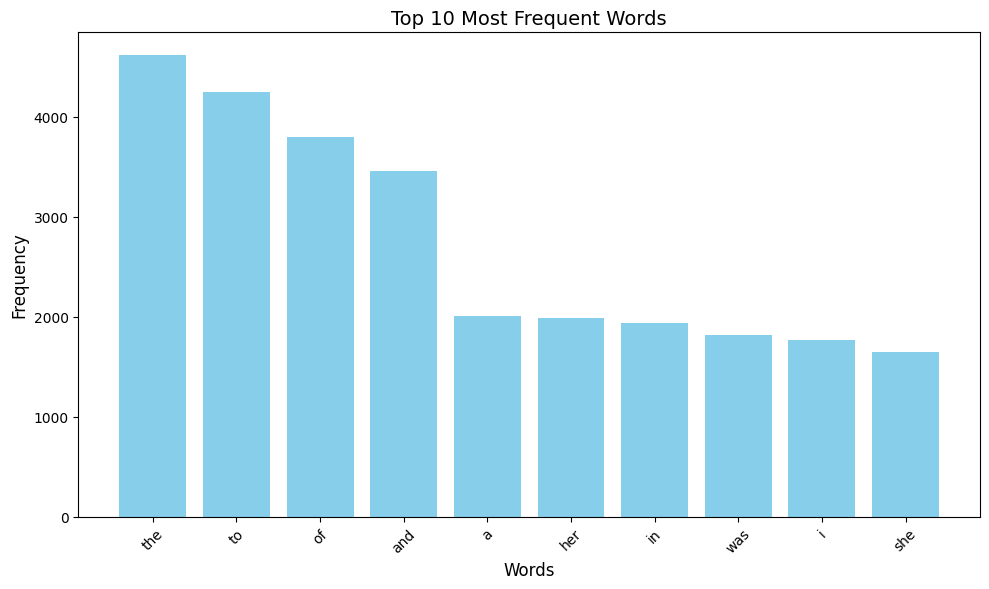

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

word_count_list = sorted_word_counts.take(10)
top_words = Counter(dict(word_count_list)).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Top 10 Most Frequent Words", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


7. Displaying the First 10 Words from the Text

This code splits the input text into words using flatMap and retrieves the first 10 words from the resulting RDD using the take(10) function. It then prints these words to give a preview of the text data. This step helps in inspecting the initial words before proceeding with further analysis or processing.

In [16]:
words = text_data.flatMap(lambda line: line.split(" "))
print(words.take(10))

['***', 'START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', '1342', '***', '']


8. Displaying the First 10 Key-Value Pairs (Word and Count)

This code maps each word from the words RDD to a key-value pair, where the key is the word in lowercase, and the value is 1. It then retrieves and prints the first 10 key-value pairs using the take(10) function. This step shows a preview of the word count mapping, helping to inspect how the words are being processed before further aggregation.

In [17]:
word_pairs = words.map(lambda word: (word.lower(), 1))
print(word_pairs.take(10))

[('***', 1), ('start', 1), ('of', 1), ('the', 1), ('project', 1), ('gutenberg', 1), ('ebook', 1), ('1342', 1), ('***', 1), ('', 1)]


9. Average Sentence Length Analysis

This code calculates the average sentence length in terms of word count:
Splits the text into individual sentences by splitting at periods (.).
Maps each sentence to its word count using len(sentence.split()).
Counts the total number of sentences with count().
Sums the total number of words using reduce.
Calculates the average sentence length by dividing the total word count by the total sentence count.
Prints the average sentence length in words, formatted to two decimal places.

In [10]:
sentences = text_data.flatMap(lambda line: line.split('.'))
sentence_lengths = sentences.map(lambda sentence: len(sentence.split()))

total_sentences = sentence_lengths.count()
total_words = sentence_lengths.reduce(lambda a, b: a + b)
avg_sentence_length = total_words / total_sentences

print(f"Average Sentence Length: {avg_sentence_length:.2f} words")


Average Sentence Length: 6.12 words


10. Sentiment Analysis

This code performs sentiment analysis on a list of words:
Filters the words that are present in the sentiment_dict (which maps words to sentiments).
Maps each word to its corresponding sentiment and assigns a count of 1.
Aggregates the counts of each sentiment using reduceByKey.
Collects the results and prints the sentiment counts in a readable format, with each sentiment capitalized.

In [11]:
words = sc.parallelize(['happy', 'sad', 'joy', 'love', 'angry', 'okay', 'fine', 'hate', 'neutral'])

sentiment_dict = {
    'happy': 'positive', 'joy': 'positive', 'love': 'positive',
    'sad': 'negative', 'angry': 'negative', 'hate': 'negative',
    'neutral': 'neutral', 'okay': 'neutral', 'fine': 'neutral'
}

sentiment_counts = words.filter(lambda word: word in sentiment_dict.keys()) \
    .map(lambda word: (sentiment_dict[word], 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .collect()

print("Sentiment Analysis Results:")
for sentiment, count in sentiment_counts:
    print(f"{sentiment.capitalize()}: {count}")


Sentiment Analysis Results:
Positive: 3
Negative: 3
Neutral: 3


11. Finding the Longest Words

This code identifies and displays the top 10 longest distinct words:
Removes duplicates from the list of words using distinct().
Maps each word to its length by applying len(word).
Sorts the words by their length in descending order using sortBy.
Takes the top 10 longest words.
Prints the top 10 longest words along with their lengths.

In [12]:
words = sc.parallelize(['happy', 'joyful', 'sad', 'angry', 'delightful', 'love', 'okay', 'extraordinary', 'hate', 'neutral'])

longest_words = words.distinct() \
    .map(lambda word: (word, len(word))) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

print("Top 10 Longest Words:")
for word, length in longest_words:
    print(f"{word}: {length}")


Top 10 Longest Words:
extraordinary: 13
delightful: 10
neutral: 7
joyful: 6
happy: 5
angry: 5
love: 4
hate: 4
okay: 4
sad: 3


12. Word Length Distribution (Histogram)

This code visualizes the distribution of word lengths:
Maps each word to its length and collects the results in word_lengths.
Creates a histogram using matplotlib, where the x-axis represents word lengths and the y-axis represents their frequency.
Sets the number of bins in the histogram to cover all possible word lengths, with edges outlined in black and bars filled with a sky-blue color.
Adds labels for the x-axis, y-axis, and a title to the plot.
Displays the histogram using plt.show().

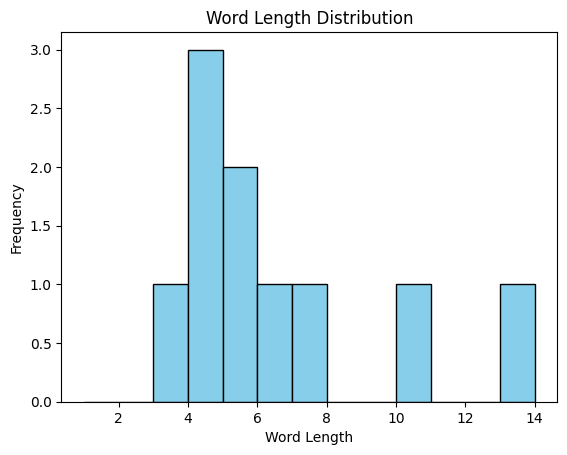

In [13]:
word_lengths = words.map(lambda word: len(word)).collect()

plt.hist(word_lengths, bins=range(1, max(word_lengths) + 2), edgecolor='black', color='skyblue')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution')
plt.show()


13. Stop Words Filtering

This code filters out common stop words and counts the remaining words:
Converts all words to lowercase to ensure case-insensitive comparison.
Filters out words that are present in the stop_words set.
Maps the remaining words to a tuple (word, 1) for counting.
Aggregates the word counts using reduceByKey.
Takes the top 10 most frequent words and prints them along with their counts.

In [14]:
stop_words = {'the', 'and', 'of', 'in', 'to', 'a', 'is', 'it', 'you', 'that'}
filtered_words = words.map(lambda word: word.lower()) \
                      .filter(lambda word: word not in stop_words)

filtered_word_counts = filtered_words.map(lambda word: (word, 1)) \
                                     .reduceByKey(lambda a, b: a + b)

top_filtered_words = filtered_word_counts.take(10)

print("Top 10 Words (Excluding Stop Words):")
for word, count in top_filtered_words:
    print(f"{word}: {count}")


Top 10 Words (Excluding Stop Words):
joyful: 1
sad: 1
love: 1
hate: 1
happy: 1
angry: 1
delightful: 1
okay: 1
extraordinary: 1
neutral: 1
